In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.linalg as la

In [13]:
#Energy in eV and rho in g cm^-3

def Matter_parameters(E, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23):
  c12=np.cos(theta_12)
  s12=np.sin(theta_12)
  c13=np.cos(theta_13)
  s13=np.sin(theta_13)
  c23=np.cos(theta_23)
  s23=np.sin(theta_23)
  U23 = np.array([ [1,0,0],[0,c23,s23],[0,-s23,c23] ])
  U13 = np.array([ [c13,0,s13],[0,1,0],[-s13,0,c13] ])
  U12 = np.array([ [c12,s12,0],[-s12,c12,0],[0,0,1] ])
  U3 = U23 @ U13 @ U12
  U3_dag = np.transpose(U3)

  #Re-evaluating the M2 with the E parameter for the function
  M2 = np.array([[0,0,0],[0,Deltam_21/2./E,0],[0,0,Deltam_31/2./E]])

  #Hamiltonian in flavour basis
  H = U3 @ M2 @ U3_dag

  #Potential in matter
  vcc = np.array([[vcc0,0.,0.],[0.,0.,0.],[0.,0.,0.]])

  #Hamiltonian in flavor basis in matter
  Hmat = H + vcc

  #eigenvalues
  eigvals, eigvecs = la.eig(Hmat)
#  eigvals = eigvals.real
  eigvals = np.absolute(eigvals)

  #sorting eigenvalues list
  id_sor = np.argsort(eigvals)

  #adding eigenvaues to a list
  eval1 = eigvals[id_sor[0]]
  eval2 = eigvals[id_sor[1]]
  eval3 = eigvals[id_sor[2]]

  #collecting eigenvectors from sorted eigenvalues
  eve1 = eigvecs[:,id_sor[0]]
  eve2 = eigvecs[:,id_sor[1]]
  eve3 = eigvecs[:,id_sor[2]]

  #Eigenvector for electron neutrino spectrum
  Ue1 = math.copysign(1,eve1[0])*eve1[0]
  Ue2 = math.copysign(1,eve1[0])*eve2[0]
  Ue3 = math.copysign(1,eve1[0])*eve3[0]
  #Eigenvector for muon neutrino spectrum
  Umu1 = math.copysign(1,eve3[1])*eve1[1]
  Umu2 = math.copysign(1,eve3[1])*eve2[1]
  Umu3 = math.copysign(1,eve3[1])*eve3[1]
  #Eigenvector for tau neutrino spectrum
  Utau1 = math.copysign(1,eve3[2])*eve1[2]
  Utau2 = math.copysign(1,eve3[2])*eve2[2]
  Utau3 = math.copysign(1,eve3[2])*eve3[2]

  #Lists with Uei and eigenvalues to be returned
  Ue = [Ue1, Ue2, Ue3]
  Umu = [Umu1, Umu2, Umu3]
  Utau = [Utau1, Utau2, Utau3]
  m_eva = [eval1, eval2, eval3]

  return Ue, Umu, Utau, m_eva


In [14]:
################################################################
########################## 2 familes ###########################
################################################################

Deltam_21=8.e-5
theta_12=0.59
enu=10.       #Neutrino energy in MeV
Gf = 1.16632  #10^{-23} suppressed
Na = 6.022    #10^{+23} suppressed
Yp=0.5
pi=np.arccos(-1)
m1=0.001
m2=np.sqrt(Deltam_21+m1**2)

c_12=np.cos(theta_12)
s_12=np.sin(theta_12)
c2t=c_12**2-s_12**2
s2t=2*s_12*c_12

rho_list=np.linspace(-1, 4, num=50, endpoint=True) #rho in g/cm^3 .1 e 5. #do prof
rho_list=10.**rho_list
vcc = np.sqrt(2.)*Yp*rho_list*Gf*Na/((5.068e4)**3)

delm=Deltam_21/4.e6/enu
t2t=delm*2*s_12*c_12/(delm*(c_12**2-s_12**2)-vcc)
c2tm=(delm*(c_12**2-s_12**2)-vcc)/np.sqrt((delm*(c_12**2-s_12**2)-vcc)**2.+(delm*2*s_12*c_12)**2)
thetam=np.arccos(c2tm)/np.pi
lambda1=(m1**2+m2**2.)/4.e6/enu+0.5*vcc-np.sqrt((delm*(c_12**2.-s_12**2.)-0.5*vcc)**2.+(delm*2.*s_12*c_12)**2.)
lambda2=(m1**2+m2**2.)/4.e6/enu+0.5*vcc+np.sqrt((delm*(c_12**2.-s_12**2.)-0.5*vcc)**2.+(delm*2.*s_12*c_12)**2.)
l1anlow=m1**2/2.e6/enu+vcc*c_12**2
l2anlow=m2**2/2.e6/enu+vcc*s_12**2
l1anhigh=[m2**2/2.e6/enu-2*delm*s_12**2]*len(vcc)
l2anhigh=m1**2/2.e6/enu+2*delm*s_12**2+vcc


(1e-14, 1e-08)

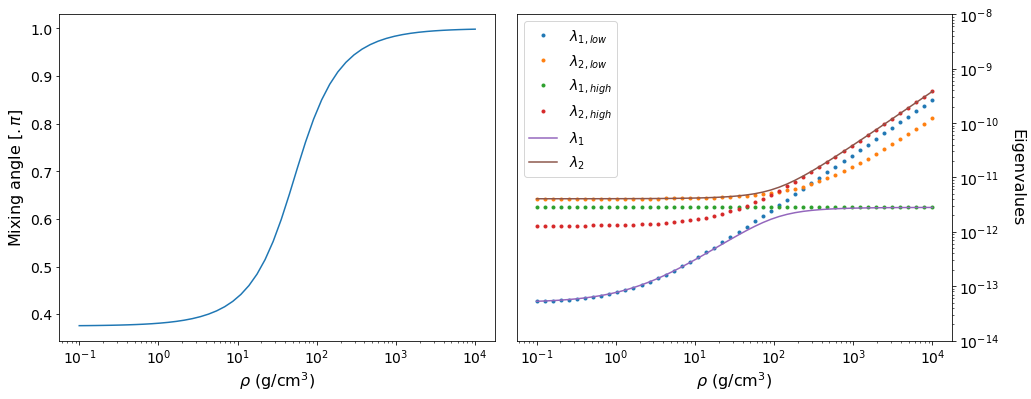

In [15]:

fix, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0.05, hspace=0)

ax1.plot(rho_list,thetam)
ax1.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize=16)
ax1.set_ylabel(r"Mixing angle [$.\pi$]",fontsize=16)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.set_xscale("log")

ax2.plot(rho_list,l1anlow, '.')
ax2.plot(rho_list,l2anlow, '.')
ax2.plot(rho_list,l1anhigh, '.')
ax2.plot(rho_list,l2anhigh, '.')
ax2.plot(rho_list,lambda1)
ax2.plot(rho_list,lambda2)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend(["$\lambda_{1,low}$", "$\lambda_{2,low}$", "$\lambda_{1,high}$","$\lambda_{2,high}$","$\lambda_{1}$","$\lambda_{2}$"],fontsize=14)#, bbox_to_anchor=(0.15,.42))
ax2.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize = 16)
ax2.set_ylabel(r"Eigenvalues",rotation=270,fontsize = 16,labelpad=25)
ax2.set_xscale("log")
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim((1e-14,1e-8))


In [22]:
################################################################
########################## 3 familes ###########################
################################################################

Deltam_21=8.e-5
Deltam_31=2.5e-3
theta_12=0.59
theta_13 = 0.148
theta_23= 0.738

enu=10.       #Neutrino energy in MeV
Gf = 1.16632  #10^{-23} suppressed
Na = 6.022    #10^{+23} suppressed
Yp=0.5
pi=np.arccos(-1)

c_12,s_12=np.cos(theta_12),np.sin(theta_12)
c_13,s_13=np.cos(theta_13),np.sin(theta_13)
c_23,s_23=np.cos(theta_23),np.sin(theta_23)
U_12=np.array([[c_12,s_12,0],[-s_12,c_12,0],[0,0,1]])
U_13=np.array([[c_13,0,s_13],[0,1,0],[-s_13,0,c_13]])
U_23=np.array([[1,0,0],[0,c_23,s_23],[0,-s_23,c_23]])
U_vac=U_23 @ U_13 @ U_12

rho_list=np.linspace(0, 6, num=100, endpoint=True) #rho in g/cm^3 .1 e 5. #do prof
rho_list=10.**rho_list
vcc = np.sqrt(2.)*Yp*rho_list*Gf*Na/((5.068e4)**3)

#--------------------------------------------
#-------------  numerical -------------------
m1m,m2m,m3m = [],[],[]
t23m,t13m,t12m=[],[],[]
for i in range(len(rho_list)):
  vcc0=vcc[i]
  Ue = Matter_parameters(enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[0]
  Um = Matter_parameters(enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[1]
  Ut = Matter_parameters(enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[2]
  evm = Matter_parameters(enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23)[3]
  t23m.append(np.arctan(abs(Um[2]/Ut[2]))/pi)
  t13m.append(np.arcsin(abs(Ue[2]))/pi)
  t12m.append(np.arctan(abs(Ue[1]/Ue[0]))/pi)
  m1m.append(evm[0])
  m2m.append(evm[1])
  m3m.append(evm[2])


In [23]:
#--------------------------------------------
#----------  analytical, low V --------------

c_2t13=np.cos(2.*theta_13)
s_2t13=np.sin(2.*theta_13)
c_2t12=np.cos(2.*theta_12)
s_2t12=np.sin(2.*theta_12)
s_23=np.sin(theta_23)
s2_t23=s_23**2.

deltE=Deltam_21/(4.e6*enu)
deltE_m_l = +np.sqrt((-deltE*c_2t12+vcc*c_13**2./2.)**2 + (deltE*s_2t12)**2)
c_2t12m_l=(+deltE*c_2t12-vcc*c_13**2./2.)/deltE_m_l
t12m_l=0.5*np.arccos(c_2t12m_l)/pi
m1m_l=deltE+0.5*vcc*c_13**2-np.sqrt((-deltE*c_2t12+vcc*c_13**2./2.)**2 + (deltE*s_2t12)**2)
m2m_l=deltE+0.5*vcc*c_13**2+deltE_m_l
m3m_l=Deltam_31/(2.e6*enu)+vcc*s_13**2

#--------------------------------------------
#----------  analytical, high V --------------

deltE=Deltam_31/(4.e6*enu)
deltE_m_h = +np.sqrt((-deltE*c_2t13+vcc/2.)**2 + (deltE*s_2t13)**2)
c_2t13m_h=(+deltE*c_2t13-vcc/2.)/deltE_m_h
t13m_h=0.5*np.arccos(c_2t13m_h)/pi
deltE=Deltam_31/(4.e6*enu)
m2m_h=deltE+0.5*vcc-np.sqrt((-deltE*c_2t13+vcc/2.)**2 + (deltE*s_2t13)**2)
m3m_h=deltE+0.5*vcc+np.sqrt((-deltE*c_2t13+vcc/2.)**2 + (deltE*s_2t13)**2)


(1e-14, 1e-07)

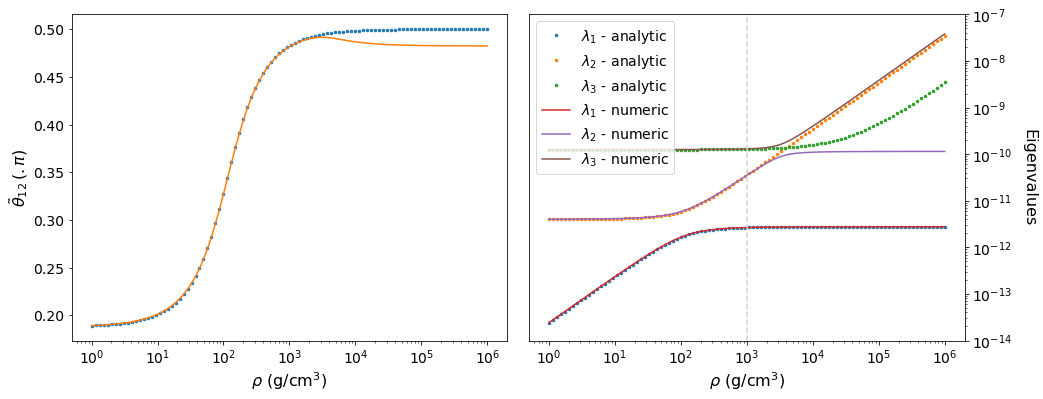

In [24]:
fix, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0.05, hspace=0)

ax1.plot(rho_list,t12m_l, '.',markersize=5, label = "Analytical")
ax1.plot(rho_list,t12m, label = 'Numerical')
ax1.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize=16)
ax1.set_ylabel(r"$\tilde{\theta}_{12} \,(.\pi)$",fontsize=16)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.set_xscale("log")

ax2.plot(rho_list,m1m_l,'.',markersize=5, label = "$\lambda_1$ - analytic")
ax2.plot(rho_list,m2m_l,'.',markersize=5, label = "$\lambda_2$ - analytic")
ax2.plot(rho_list,m3m_l,'.',markersize=5, label = "$\lambda_3$ - analytic")
ax2.plot(rho_list,m1m, label = "$\lambda_1$ - numeric")
ax2.plot(rho_list,m2m, label = "$\lambda_2$ - numeric")
ax2.plot(rho_list,m3m, label = "$\lambda_3$ - numeric")
ax2.axvline(x = 1000, ls = '--', color = 'lightgrey')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend(["$\lambda_1$ - analytic", "$\lambda_2$ - analytic", "$\lambda_3$ - analytic","$\lambda_1$ - numeric","$\lambda_2$ - numeric","$\lambda_3$ - numeric"],fontsize=14)#, bbox_to_anchor=(0.15,.42))
ax2.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize = 16)
ax2.set_ylabel(r"Eigenvalues",rotation=270,fontsize = 16,labelpad=25)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim((1e-14,1e-7))

(1e-14, 1e-07)

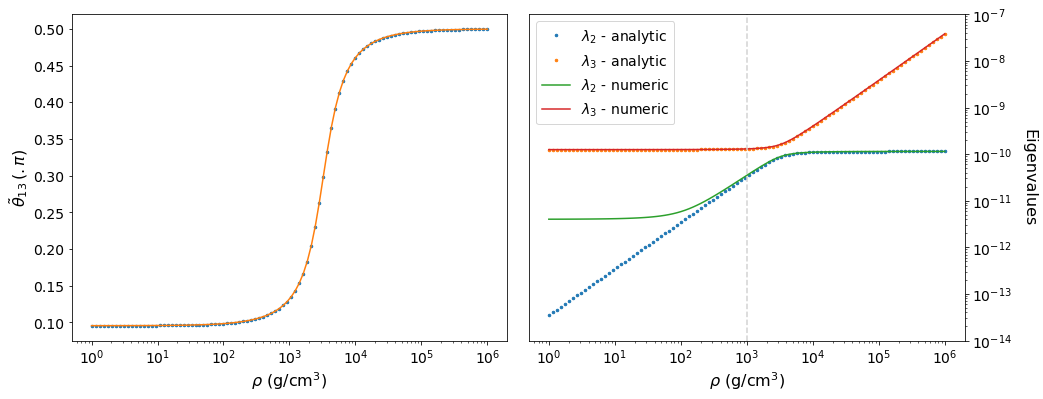

In [25]:
fix, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0.05, hspace=0)

ax1.plot(rho_list,t13m_h, '.',markersize=5,label = 'Analytical')
ax1.plot(rho_list,t13m,label = 'Numerical')
ax1.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize=16)
ax1.set_ylabel(r"$\tilde{\theta}_{13} \,(.\pi)$",fontsize=16)
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.set_xscale("log")

ax2.plot(rho_list,m2m_h,'.',markersize=5,label = "$\lambda_2$ - analytic")
ax2.plot(rho_list,m3m_h,'.',markersize=5,label = "$\lambda_3$ - analytic")
ax2.plot(rho_list,m2m,label = "$\lambda_2$ - numeric")
ax2.plot(rho_list,m3m,label = "$\lambda_3$ - numeric")
ax2.axvline(x = 1000, ls = '--', color = 'lightgrey')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend(["$\lambda_2$ - analytic", "$\lambda_3$ - analytic","$\lambda_2$ - numeric","$\lambda_3$ - numeric"],fontsize=14)#, bbox_to_anchor=(0.15,.42))
ax2.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize = 16)
ax2.set_ylabel(r"Eigenvalues",rotation=270,fontsize = 16,labelpad=25)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim((1e-14,1e-7))

In [26]:
#--------------------------------------------
#-----  high V, theta23 and theta12 ---------

U23 = np.array([ [1,0,0],[0,c_23,s_23],[0,-s_23,c_23] ])
U13 = np.array([ [c_13,0,s_13],[0,1,0],[-s_13,0,c_13] ])
U12 = np.array([ [c_12,s_12,0],[-s_12,c_12,0],[0,0,1] ])
U3 = U23 @ U13 @ U12
U3_dag = np.transpose(U3)
M2 = np.array([[0,0,0],[0,Deltam_21/2.e6/enu,0],[0,0,Deltam_31/2.e6/enu]])
H = U3 @ M2 @ U3_dag
tan23m=H[0][1]/H[0][2]
th23m=np.arctan(tan23m)
htmp=0.5*(H[1][1]+H[2][2])
Hmat = H - np.array([[htmp,0,0],[0,htmp,0],[0,0,htmp]])
s2alpha=Hmat[1][2]/np.sqrt(Hmat[1][2]**2+Hmat[1][1]**2)
c2alpha=-Hmat[1][1]/np.sqrt(Hmat[1][2]**2+Hmat[1][1]**2)
alpha2=np.arctan(s2alpha/c2alpha)+2*pi   #2pi adicionado para dar o sinal correto de cosalpha
alpha=0.5*alpha2
th12m=alpha-0.5*pi-th23m

## checking explicit analytical expression
#Delta=0.5*((M2[2][2]-M2[1][1])+(M2[2][2]-M2[0][0]))
#delta=0.5*(M2[1][1]-M2[0][0])
#tmp1=(Delta+delta*np.cos(2*theta_12))*np.sin(theta_13)*np.sin(theta_23)+delta*np.cos(theta_23)*np.sin(2*theta_12)
#tmp2=(Delta+delta*np.cos(2*theta_12))*np.sin(theta_13)*np.cos(theta_23)-delta*np.sin(theta_23)*np.sin(2*theta_12)
#t23an=np.arctan(tmp1/tmp2)
#
#print('theta23, numerical and analytical:',t23m[len(t23m)-1],th23m/pi,t23an/pi)
#print()



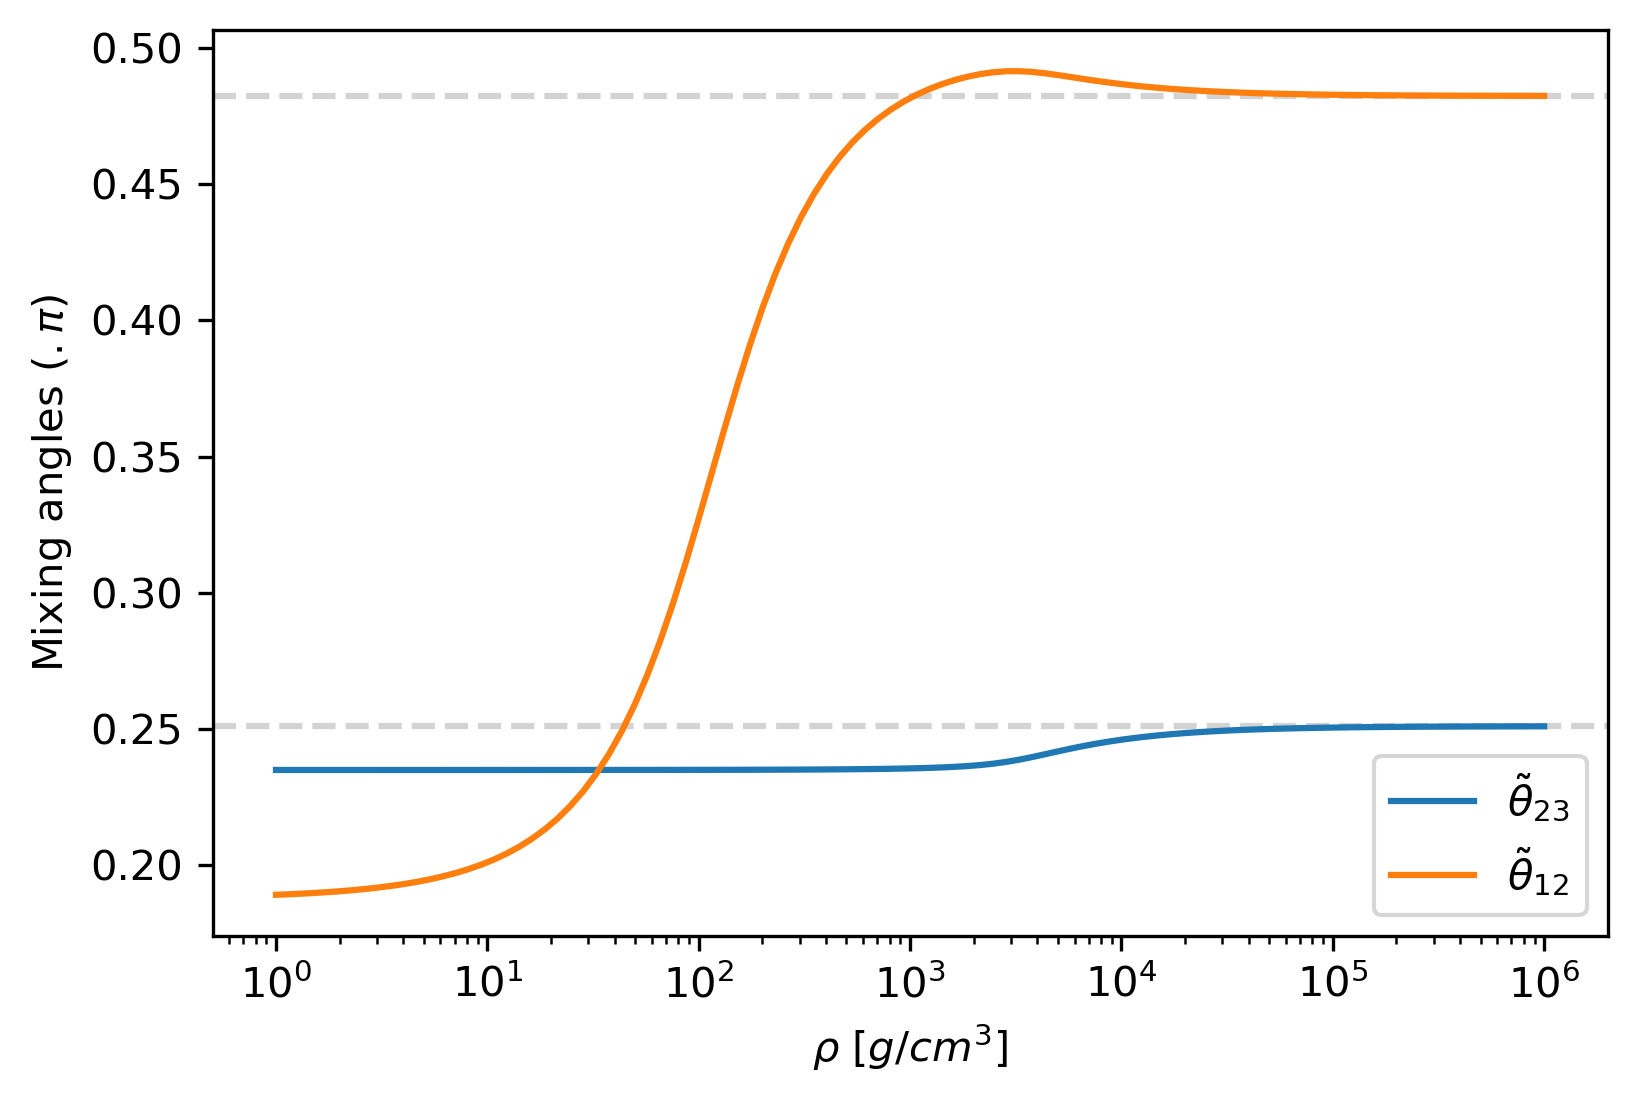

In [27]:
plt.figure(dpi = 300)
plt.axhline(y = th12m/pi, ls = '--', color = 'lightgrey')
plt.axhline(y = th23m/pi, ls = '--', color = 'lightgrey')
plt.plot(rho_list,t23m,label="$\\tilde{\\theta}_{23}$")
plt.plot(rho_list,t12m,label="$\\tilde{\\theta}_{12}$")
plt.xlabel(r"$\rho$ [$g/cm^{3}$]")
plt.ylabel(r"Mixing angles $(.\pi)$")
plt.xscale("log")
plt.legend()
plt.show()